## Import Modules

In [2]:
!nvidia-smi

Wed Sep 13 11:20:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')

## Data

In [4]:
paths=[]
labels=[]
for filename in os.listdir('/kaggle/input/speech-emotion-recognition-en/Crema'):
    
    paths.append('/kaggle/input/speech-emotion-recognition-en/Crema/' + filename)
    file = filename.split('.')[0]
   
    label = file.split('_')[2]
    if label == 'ANG':
        labels.append('angry.wav')
    elif label == 'DIS':
        labels.append('disgust.wav')
    elif label == 'FEA':
        labels.append('fear.wav')
    elif label == 'HAP':
        labels.append('happy.wav')
    elif label == 'NEU':
        labels.append('neutral.wav')
    elif label == 'SAD':
        labels.append('sad.wav')
        

df_cr = pd.DataFrame({'speech':paths,'label':labels})
df_cr.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust.wav
1,/kaggle/input/speech-emotion-recognition-en/Cr...,happy.wav
2,/kaggle/input/speech-emotion-recognition-en/Cr...,happy.wav
3,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust.wav
4,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust.wav


In [5]:
df_cr.shape

(7442, 2)

In [6]:
paths, labels = [], []

for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Ravdess'):
    for filename in filenames:
        
        
       
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '02':
            labels.append('calm.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '03':
            labels.append('happy.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '04':
            labels.append('sad.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '05':
            labels.append('angry.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '06':
            labels.append('fear.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '07':
            labels.append('disgust.wav')
            paths.append(os.path.join(dirname, filename))
        elif label[6:8] == '08':
            labels.append('ps.wav') 
            paths.append(os.path.join(dirname, filename))

df_rds = pd.DataFrame({'speech':paths, 'label':labels})

df_rds.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Ra...,ps.wav
1,/kaggle/input/speech-emotion-recognition-en/Ra...,neutral.wav
2,/kaggle/input/speech-emotion-recognition-en/Ra...,disgust.wav
3,/kaggle/input/speech-emotion-recognition-en/Ra...,disgust.wav
4,/kaggle/input/speech-emotion-recognition-en/Ra...,neutral.wav


In [7]:
df_rds.shape

(1440, 2)

In [8]:
paths, labels = [], []

for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Savee'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[:1] == 'a':
            labels.append('angry.wav')
        elif label[:1] == 'd':
            labels.append('disgust.wav')
        elif label[:1] == 'f':
            labels.append('fear.wav')
        elif label[:1] == 'h':
            labels.append('happy.wav')
        elif label[:1] == 'n':
            labels.append('neutral.wav')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad.wav')
            else:
                labels.append('ps.wav')

#paths = paths[1:] # to filter out 'info.txt' file

df_sv = pd.DataFrame({'speech':paths,  'label':labels})
                  
df_sv.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Sa...,happy.wav
1,/kaggle/input/speech-emotion-recognition-en/Sa...,fear.wav
2,/kaggle/input/speech-emotion-recognition-en/Sa...,happy.wav
3,/kaggle/input/speech-emotion-recognition-en/Sa...,disgust.wav
4,/kaggle/input/speech-emotion-recognition-en/Sa...,angry.wav


In [9]:
df_sv.shape

(480, 2)

In [10]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input/speech-emotion-recognition-en/Tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label.lower())

df_ts = pd.DataFrame({'speech':paths,'label':labels})
df_ts.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Te...,fear.wav
1,/kaggle/input/speech-emotion-recognition-en/Te...,fear.wav
2,/kaggle/input/speech-emotion-recognition-en/Te...,fear.wav
3,/kaggle/input/speech-emotion-recognition-en/Te...,fear.wav
4,/kaggle/input/speech-emotion-recognition-en/Te...,fear.wav


In [11]:
df_ts.shape

(2800, 2)

### Concatenation

In [12]:
df = pd.concat([df_cr, df_rds, df_sv, df_ts])


print('The dataset has {} audio files. Below printed 5 random entries:'.format(df.shape[0]))

df.sample(5)

The dataset has 12162 audio files. Below printed 5 random entries:


,speech,label
2745,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust.wav
2531,/kaggle/input/speech-emotion-recognition-en/Cr...,neutral.wav
1098,/kaggle/input/speech-emotion-recognition-en/Te...,angry.wav
2673,/kaggle/input/speech-emotion-recognition-en/Te...,ps.wav
1038,/kaggle/input/speech-emotion-recognition-en/Cr...,angry.wav


In [13]:
df['label'].value_counts()

label
disgust.wav    1923
happy.wav      1923
sad.wav        1923
fear.wav       1923
angry.wav      1923
neutral.wav    1703
ps.wav          652
calm.wav        192
Name: count, dtype: int64

In [14]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    
def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['speech'][df['label']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    display(Audio(path))

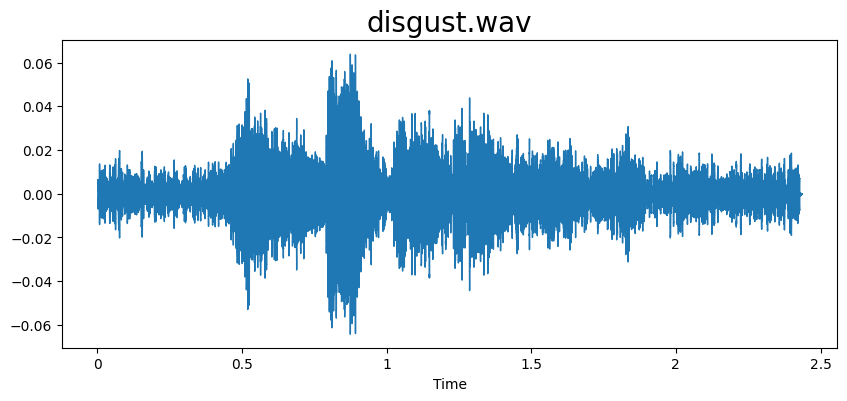

None

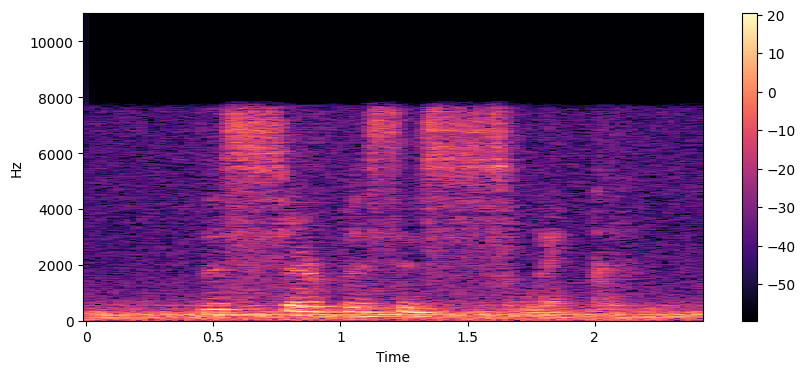

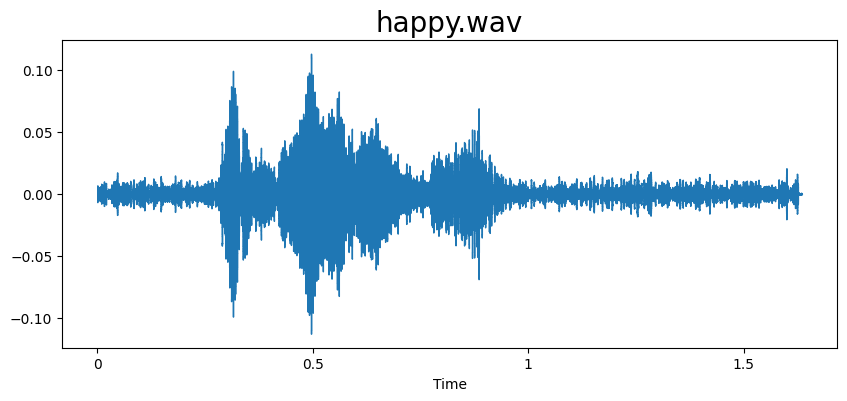

None

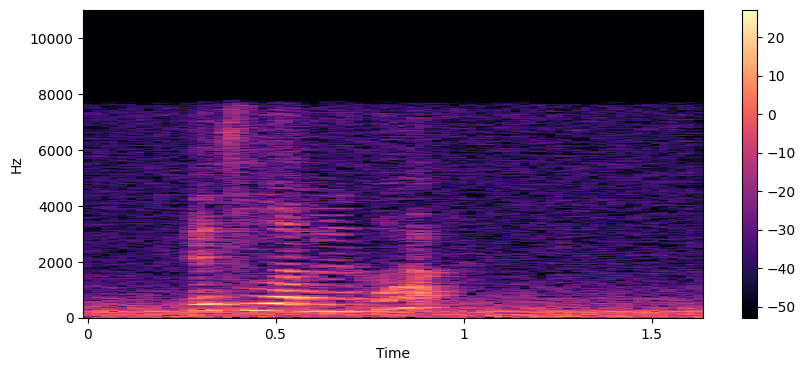

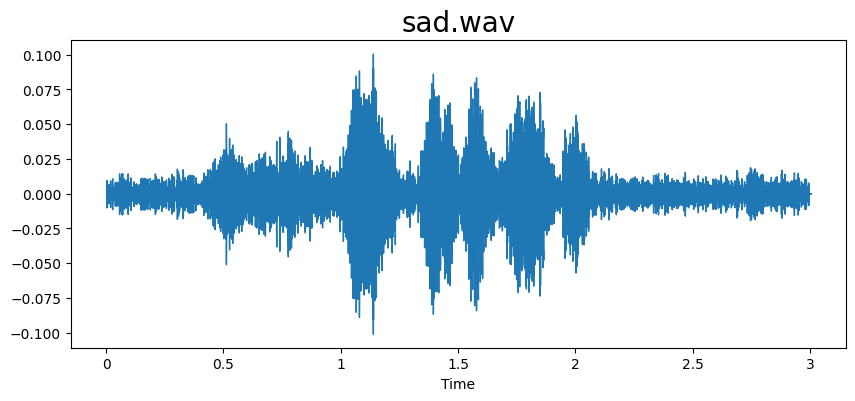

None

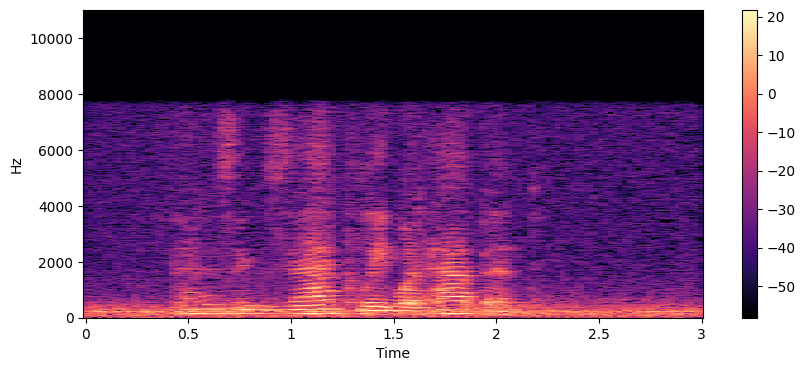

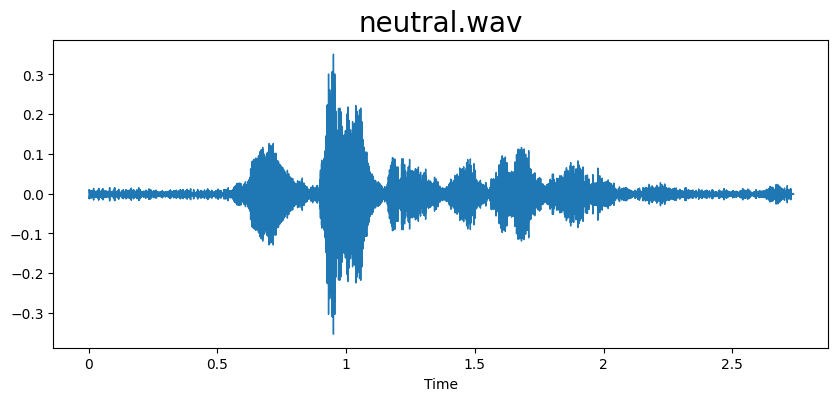

None

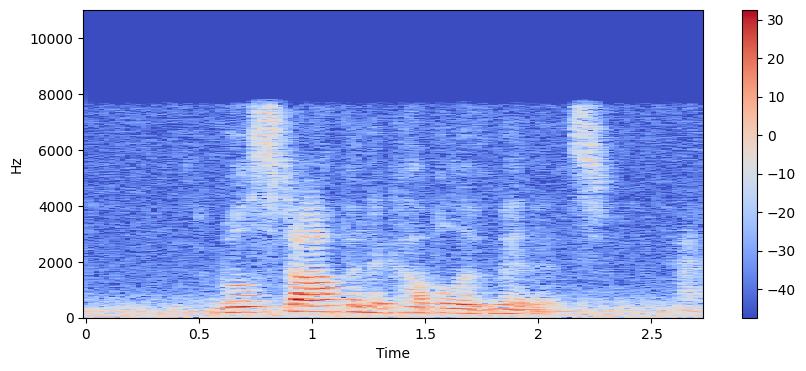

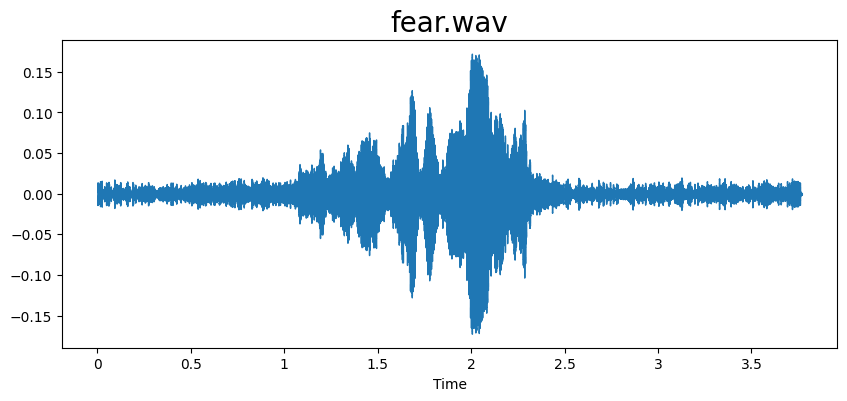

None

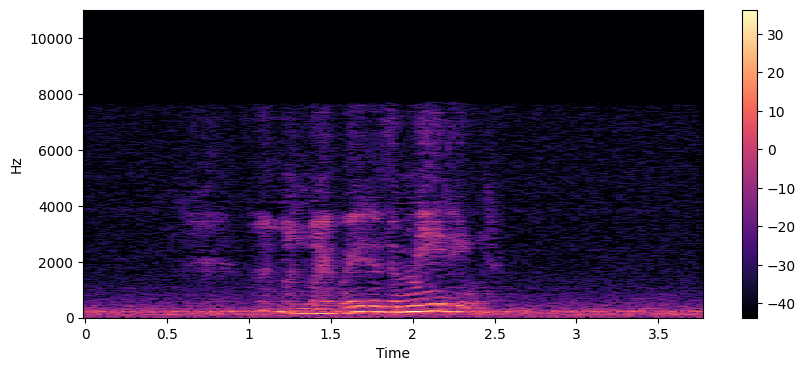

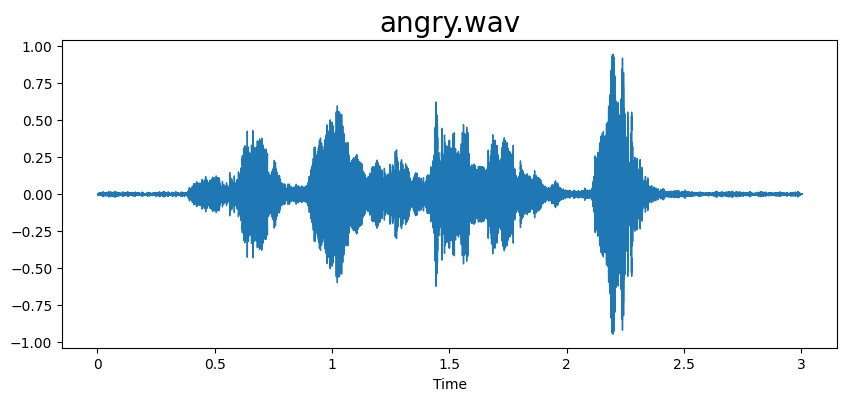

None

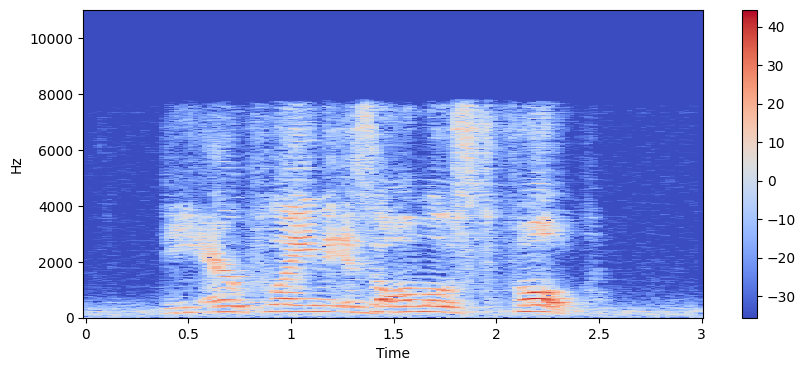

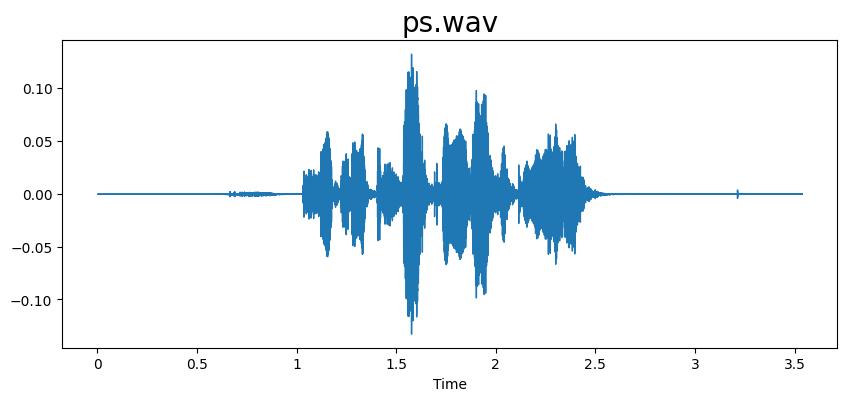

None

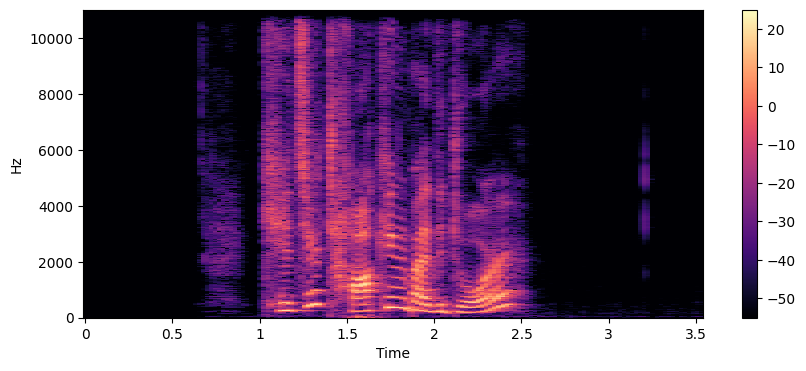

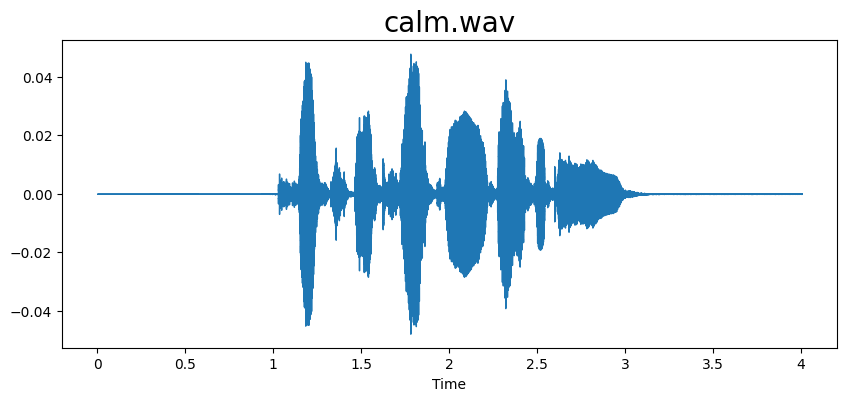

None

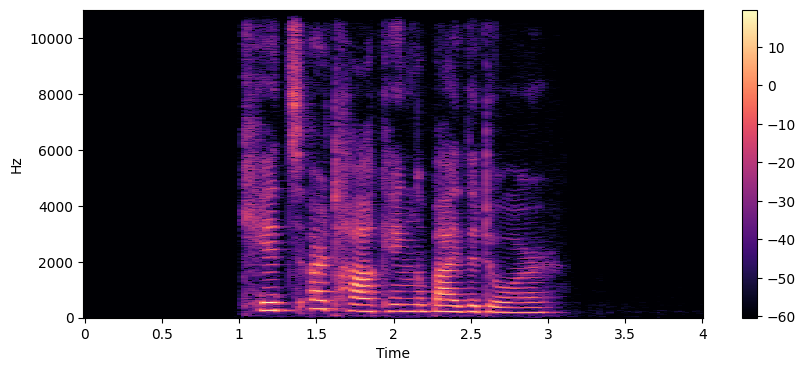

In [15]:
for i in list(df['label'].unique()):
    display(ana_emotion(i, df))

### MFCC

In [17]:
def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= df['speech'].apply(lambda x:MFCC(x))

In [18]:
mfcc

0       [-413.7522, 127.548805, 6.4432, 75.23512, -18....
1       [-431.05634, 145.30252, 9.3984995, 44.06137, -...
2       [-390.75104, 119.2987, 4.9241314, 52.241413, -...
3       [-362.1265, 126.22375, 26.561232, 44.52735, -6...
4       [-384.1598, 139.08711, 4.4927893, 46.741413, -...
                              ...                        
2795    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
2796    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
2797    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
2798    [-353.14743, 101.68391, -14.175895, -12.037377...
2799    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 12162, dtype: object

In [19]:
X =[x for x in mfcc]
X =np.array(X)
X.shape
X =np.expand_dims(X,-1)
X.shape

(12162, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
y = OneHotEncoder().fit_transform( df[['label']] )
y = y.toarray()

In [23]:
X.shape, y.shape

((12162, 40, 1), (12162, 8))

In [24]:
np.save('all_four_mfcc', X)

In [25]:
X = np.load('all_four_mfcc.npy')

In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [27]:
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(8,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 305,864
Trainable params: 305,864
Non-trai

In [28]:
from sklearn.model_selection import train_test_split




# Create train, validation and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_train = np.array([i for i in x_train])
x_valid = np.array([i for i in x_valid])
x_test = np.array([i for i in x_test])

# Plot size of data
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(7661, 40, 1)
(3284, 40, 1)
(1217, 40, 1)


In [29]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(7661, 8)
(3284, 8)
(1217, 8)


## Model Training

In [30]:
tr_m = model.fit(x_train,y_train,validation_data=(x_valid, y_valid),epochs=50,batch_size=32)

Epoch 1/50
240/240 [==============================] - 11s 12ms/step - loss: 1.7127 - accuracy: 0.3120 - val_loss: 1.4530 - val_accuracy: 0.4135
Epoch 2/50
240/240 [==============================] - 2s 9ms/step - loss: 1.4947 - accuracy: 0.3999 - val_loss: 1.3586 - val_accuracy: 0.4485
Epoch 3/50
240/240 [==============================] - 2s 9ms/step - loss: 1.3891 - accuracy: 0.4396 - val_loss: 1.3077 - val_accuracy: 0.4738
Epoch 4/50
240/240 [==============================] - 2s 8ms/step - loss: 1.3411 - accuracy: 0.4553 - val_loss: 1.2486 - val_accuracy: 0.5018
Epoch 5/50
240/240 [==============================] - 2s 7ms/step - loss: 1.3004 - accuracy: 0.4711 - val_loss: 1.2561 - val_accuracy: 0.4814
Epoch 6/50
240/240 [==============================] - 2s 7ms/step - loss: 1.2783 - accuracy: 0.4798 - val_loss: 1.2513 - val_accuracy: 0.4826
Epoch 7/50
240/240 [==============================] - 2s 9ms/step - loss: 1.2492 - accuracy: 0.4969 - val_loss: 1.2197 - val_accuracy: 0.5091
Epoc

In [31]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)

print("Test loss: {:.2f}".format(loss_test))
print("Test accuracy: {:.2f}%".format(100 * accuracy_test))

39/39 [==============================] - 0s 4ms/step - loss: 1.5402 - accuracy: 0.5538
Test loss: 1.54
Test accuracy: 55.38%


In [32]:
model.save('lstm_all_four.h5')

In [33]:
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Voice_Detection_Model_0.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [34]:
with open(Pkl_Filename, 'rb') as file:  
    Voice_Detection_Model_0 = pickle.load(file)

Voice_Detection_Model_0

In [35]:
y_pred=Voice_Detection_Model_0.predict(x_test)
y_pred

39/39 [==============================] - 1s 3ms/step


array([[2.98762470e-02, 1.62790966e-05, 1.88791677e-01, ...,
        4.31379706e-01, 4.47602397e-05, 5.72659224e-02],
       [9.56819534e-01, 4.27340726e-14, 3.08424717e-08, ...,
        6.86903221e-17, 4.31693494e-02, 4.67113570e-11],
       [3.17363851e-02, 6.93832772e-06, 9.09066051e-02, ...,
        5.94745219e-01, 1.10884948e-05, 3.98640409e-02],
       ...,
       [3.12556980e-10, 6.61199633e-22, 4.14108201e-12, ...,
        1.11214568e-18, 1.12340487e-21, 6.68956304e-08],
       [9.99370635e-01, 1.71660781e-18, 1.45338781e-04, ...,
        1.34461236e-12, 8.10221302e-13, 2.77343253e-12],
       [4.26981784e-02, 1.12261485e-11, 1.77905522e-03, ...,
        7.10140000e-07, 4.73899098e-09, 3.06010236e-07]], dtype=float32)

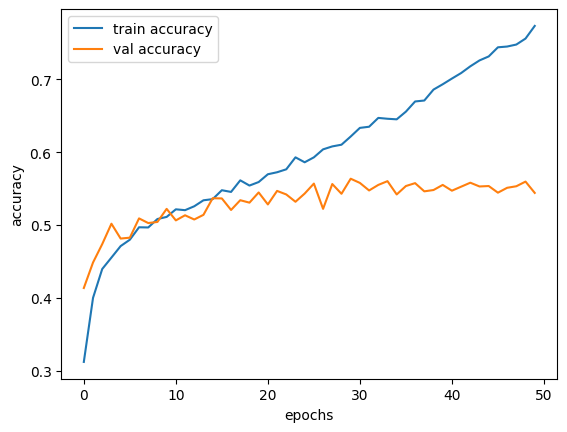

In [37]:
epochs = list(range(50))
acc = tr_m.history['accuracy']
val_acc = tr_m.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

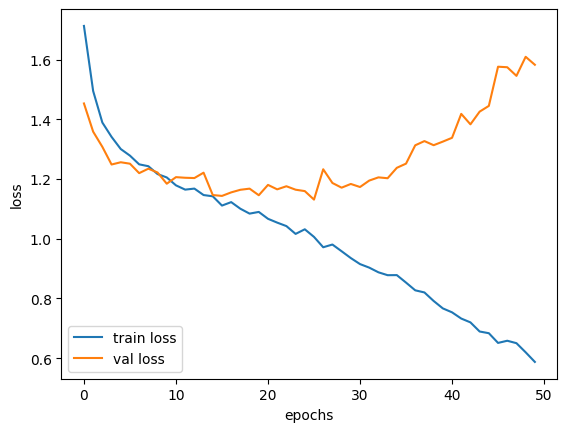

In [39]:
epochs = list(range(50))
loss = tr_m.history['loss']
val_loss = tr_m.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Benchmarking
*** LSTM ***

In [43]:
model1 = Sequential()
model1.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model1.add(Dropout(0.5))
model1.add(LSTM(128))
model1.add(Dropout(0.5))
model1.add(Dense(8, activation='softmax'))

In [44]:
# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/50
240/240 [==============================] - 9s 14ms/step - loss: 1.6818 - accuracy: 0.3182 - val_loss: 1.4598 - val_accuracy: 0.4041
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 1.4449 - accuracy: 0.4211 - val_loss: 1.3153 - val_accuracy: 0.4741
Epoch 3/50
240/240 [==============================] - 3s 10ms/step - loss: 1.3631 - accuracy: 0.4552 - val_loss: 1.3037 - val_accuracy: 0.4738
Epoch 4/50
240/240 [==============================] - 3s 11ms/step - loss: 1.3313 - accuracy: 0.4613 - val_loss: 1.2963 - val_accuracy: 0.4674
Epoch 5/50
240/240 [==============================] - 3s 11ms/step - loss: 1.3000 - accuracy: 0.4762 - val_loss: 1.2407 - val_accuracy: 0.4985
Epoch 6/50
240/240 [==============================] - 2s 10ms/step - loss: 1.2789 - accuracy: 0.4810 - val_loss: 1.2466 - val_accuracy: 0.4918
Epoch 7/50
240/240 [==============================] - 2s 10ms/step - loss: 1.2544 - accuracy: 0.4939 - val_loss: 1.2122 - val_accuracy: 0.5128

In [45]:
model1.save('lstm_all_four_complex.h5')

In [46]:
Pkl_Filename = "Voice_Detection_Model_1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model1, file)

In [47]:
from tensorflow import keras
model1 = keras.models.load_model('/kaggle/working/lstm_all_four_complex.h5')

In [48]:
# Collect loss and accuracy for the test set
loss_test, accuracy_test = model1.evaluate(x_test, y_test)

print("Test loss: {:.2f}".format(loss_test))
print("Test accuracy: {:.2f}%".format(100 * accuracy_test))

39/39 [==============================] - 1s 5ms/step - loss: 1.3496 - accuracy: 0.5505
Test loss: 1.35
Test accuracy: 55.05%


*** LSTM (CNN) ***

In [49]:
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Activation, BatchNormalization

# Define the model architecture
model2 = Sequential()
model2.add(Conv1D(64, 3, input_shape=(40, 1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(32))
model2.add(Dense(8, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# Train the model
tr_m1 = model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
240/240 [==============================] - 10s 11ms/step - loss: 1.7492 - accuracy: 0.3001 - val_loss: 1.5348 - val_accuracy: 0.3965
Epoch 2/50
240/240 [==============================] - 2s 9ms/step - loss: 1.4748 - accuracy: 0.4160 - val_loss: 1.4737 - val_accuracy: 0.3995
Epoch 3/50
240/240 [==============================] - 2s 7ms/step - loss: 1.3857 - accuracy: 0.4499 - val_loss: 1.3748 - val_accuracy: 0.4421
Epoch 4/50
240/240 [==============================] - 2s 7ms/step - loss: 1.3444 - accuracy: 0.4669 - val_loss: 1.3372 - val_accuracy: 0.4598
Epoch 5/50
240/240 [==============================] - 2s 8ms/step - loss: 1.3072 - accuracy: 0.4785 - val_loss: 1.3066 - val_accuracy: 0.4708
Epoch 6/50
240/240 [==============================] - 2s 7ms/step - loss: 1.2859 - accuracy: 0.4888 - val_loss: 1.2596 - val_accuracy: 0.5006
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: 1.2742 - accuracy: 0.4899 - val_loss: 1.2601 - val_accuracy: 0.4890
Epoc

In [51]:
model2.save('lstm_all_four_cnn.h5')

In [52]:
Pkl_Filename = "Voice_Detection_Model_cnn.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model2, file)

### Demo

In [54]:
!apt-get update -y
!apt-get install -y portaudio19-dev
!pip install pyaudio

Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5023 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:5 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]        
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]      
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [508 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [498 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1064 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 

In [58]:
import pyaudio

p = pyaudio.PyAudio()

# Get a list of available audio devices and their info
for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"Device {i}: {info['name']}")

p.terminate()


In [67]:
import pyaudio
print(pyaudio.__version__)

0.2.13


In [68]:
! pip install --upgrade pyaudio

In [69]:
import pyaudio

p = pyaudio.PyAudio()

# Print a list of available audio devices and their info
for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"Device {i}: {info['name']}, InputChannels: {info['maxInputChannels']}, OutputChannels: {info['maxOutputChannels']}")


In [ ]:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16  # paInt8
CHANNELS = 2 
RATE = 44100  # sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output1.wav"

p = pyaudio.PyAudio()

# Open the audio stream using the default input device
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    input_device_index=None,  # Use the system's default input device
    frames_per_buffer=CHUNK
)

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)  # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()
